<a href="https://colab.research.google.com/github/HenryLiu714/ct_classification/blob/main/ModelVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install keras-visualizer
!pip install visualkeras

     |████████████████████████████████| 992 kB 4.2 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/Stem Proyectp/Project/Models/model_6")

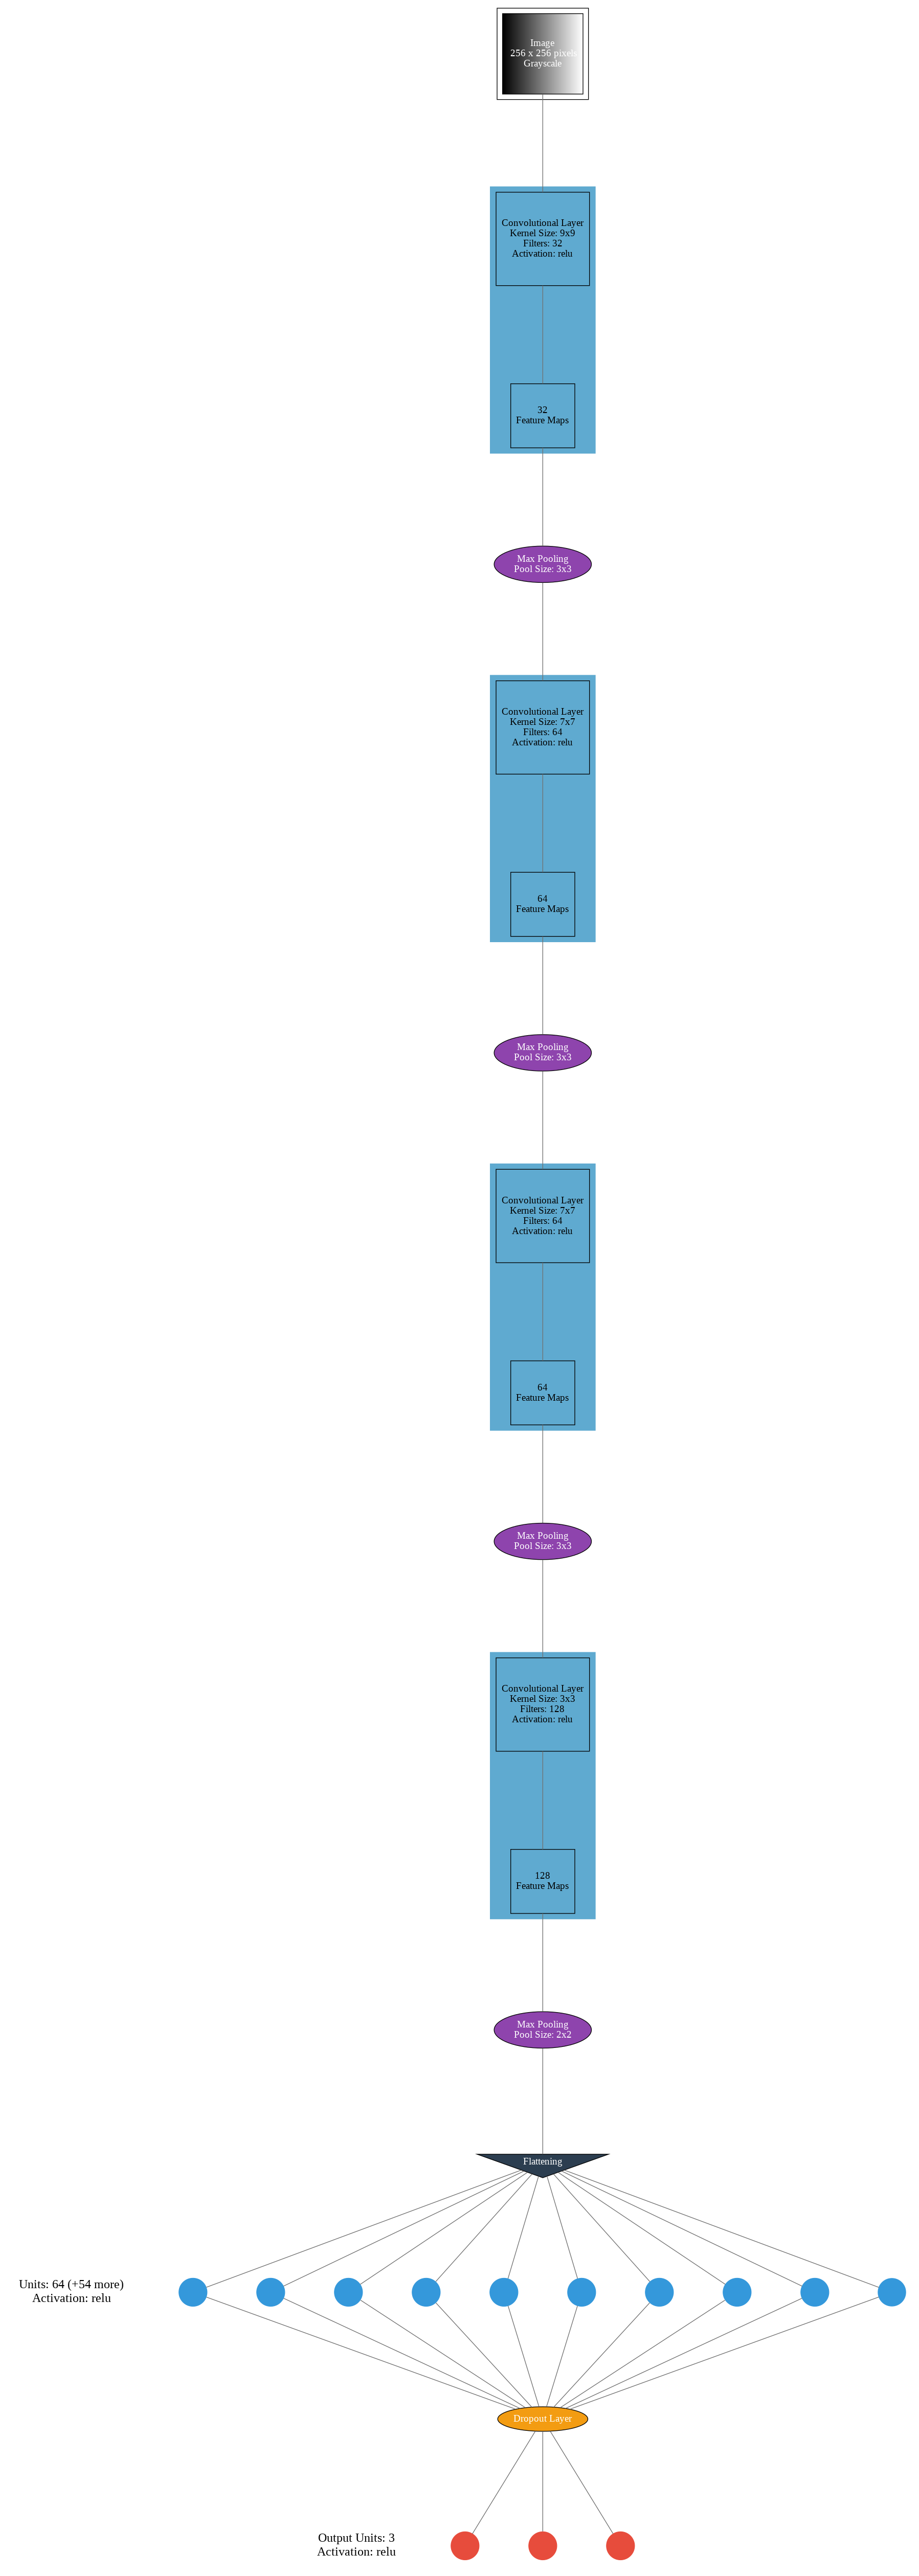

In [ ]:
from keras_visualizer import visualizer
from IPython.display import Image
visualizer(model, format = 'png', view = True)
Image("graph.png")

In [ ]:
import visualkeras

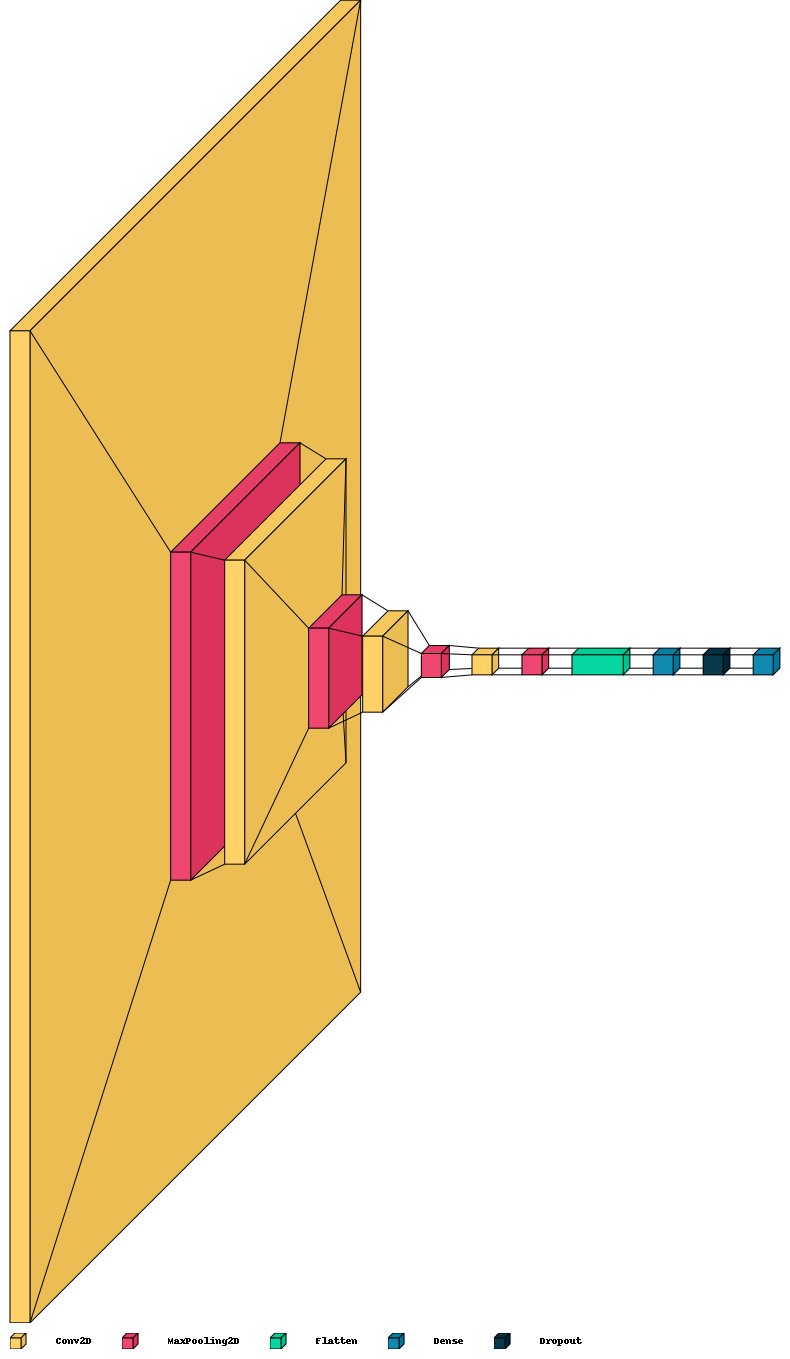

In [ ]:
visualkeras.layered_view(model, legend = True,  spacing = 30)

In [ ]:
X1 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set2_features.npy") # Non-equalized images
y1 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set2_labels.npy")

X2 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set4_features.npy") # Mix images
y2 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set4_labels.npy")

X3 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set3_features.npy") # All equalized images
y3 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set3_labels.npy")

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X1, y1, test_size = 0.3, random_state = 17)
X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 9)

X_train2, X_rem2, y_train2, y_rem2 = train_test_split(X2, y2, test_size = 0.3, random_state = 17)
X_test2, X_valid2, y_test2, y_valid2 = train_test_split(X_rem2, y_rem2, test_size = 0.5, random_state = 9)

In [ ]:
import sklearn

In [ ]:
model1 = keras.models.load_model("/content/drive/MyDrive/Stem Proyectp/Project/Models/model_3")
model2 = keras.models.load_model("/content/drive/MyDrive/Stem Proyectp/Project/Models/model_4")
model3 = keras.models.load_model("/content/drive/MyDrive/Stem Proyectp/Project/Models/model_6")

In [ ]:
predictions = model3.predict(X_test2)
print(predictions)

[[1.70235755e-03 9.97746885e-01 5.50674275e-04]
 [2.20084935e-01 7.79914677e-01 3.57152288e-07]
 [1.97997894e-02 9.79404092e-01 7.96168926e-04]
 [4.66914475e-01 4.65972364e-01 6.71131238e-02]
 [4.34833109e-01 5.08873343e-01 5.62935397e-02]
 [3.98660928e-01 5.31515479e-01 6.98235929e-02]
 [3.56711411e-07 5.88147759e-06 9.99993801e-01]
 [4.33701605e-01 5.07079720e-01 5.92186004e-02]
 [4.14725035e-01 5.18789351e-01 6.64855987e-02]
 [1.44019657e-06 2.59812168e-05 9.99972582e-01]
 [1.20964125e-13 4.43569265e-10 1.00000000e+00]
 [5.85667184e-03 9.94085312e-01 5.79540720e-05]
 [4.14613456e-01 5.16101182e-01 6.92854375e-02]
 [4.53498855e-04 9.99326944e-01 2.19533962e-04]
 [4.37958211e-01 4.96010035e-01 6.60316944e-02]
 [5.21347113e-02 9.47081506e-01 7.83766562e-04]
 [4.46698636e-01 4.90689337e-01 6.26120418e-02]
 [6.61356300e-02 9.33703184e-01 1.61166870e-04]
 [9.81906176e-01 1.80935860e-02 2.12026862e-07]
 [2.15278869e-03 9.97839332e-01 7.84164695e-06]
 [2.97211140e-01 7.02786267e-01 2.595236

In [ ]:
def testModel(modelx, test_images, test_labels):
  correct = 0

  outputs = []
  spec_acc = []
  total = len(test_images)

  hem_total = 0
  isch_total = 0
  norm_total = 0

  hem = 0
  isch = 0
  norm = 0

  false_hem = 0
  false_isch = 0
  false_norm = 0

  predictions = modelx.predict(test_images)
  
  for i in range(0, len(test_images)):
    predictions_list = list(predictions[i])

    maximum = max(predictions_list)
    prediction = predictions_list.index(maximum)

    if prediction == test_labels[i]:
      correct += 1

    outputs.append(prediction)

    if test_labels[i] == 0:
      norm_total += 1
      if prediction == 0:
        norm += 1

    elif test_labels[i] == 1:
      hem_total += 1
      if prediction == 1:
        hem += 1

    elif test_labels[i] == 2:
      isch_total += 1
      if  prediction == 2:
        isch += 1

    if prediction == 0 and test_labels[i] != 0:
      false_norm += 1
    elif prediction == 1 and test_labels[i] != 1:
      false_hem += 1
    elif prediction == 2 and test_labels[i] != 2:
      false_isch += 1

  accuracy = float(correct) / total

  spec_acc.append(float(norm)/norm_total)
  spec_acc.append(float(hem)/hem_total)
  spec_acc.append(float(isch)/isch_total)

  spec_acc.append([false_norm, false_hem, false_isch])

  return accuracy, outputs, spec_acc

In [ ]:
acc, out, spec = testModel(model3, X_test, y_test)

In [ ]:
conf_mat = tf.math.confusion_matrix(y_test, out, num_classes=3)

In [ ]:
import seaborn as sns

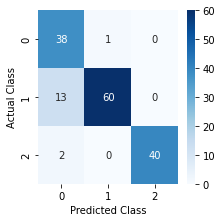

In [ ]:
figure = plt.figure(figsize=(3, 3))
sns.heatmap(conf_mat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()